In [ ]:
# list different types of statistical distributions
# 1. Normal Distribution
# 2. Binomial Distribution
# 3. Poisson Distribution
# 4. Exponential Distribution
# 5. Chi-Square Distribution
# 6. Student's t-Distribution
# 7. F-Distribution
# 8. Uniform Distribution
# 9. Logistic Distribution
# 10. Pareto Distribution
# 11. Weibull Distribution
# 12. Lognormal Distribution
# 13. Hypergeometric Distribution
# 14. Triangular Distribution
# 15. Beta Distribution
# 16. Gamma Distribution
# 17. Right Skewed Distribution
# 18. Left Skewed Distribution
# 19. Bimodal Distribution
# 20. Multimodal Distribution

In [2]:
# generate synthetic data and plot the distributions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm, binom, poisson, expon, chi2, t, f, uniform, logistic, pareto, weibull_min, lognorm, hypergeom, triang, beta, gamma


# Normal Distribution

c:\Users\SWECSAT056\Documents\KonaAI_ML\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


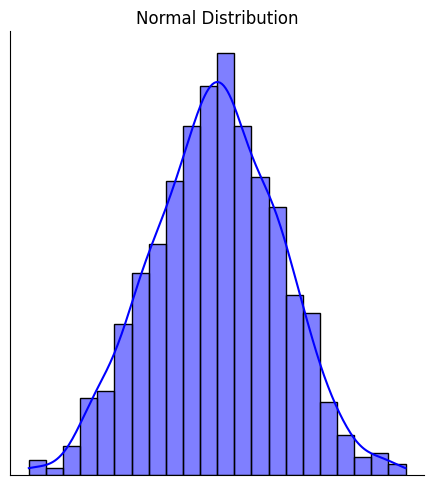

In [17]:
# generate perfect normal distribution
data = np.random.normal(0, 1, 1000)
sns.displot(data, kde=True, color='blue')
plt.title('Normal Distribution')
# remove axis labels
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

plt.show()

# Uniform Distribution

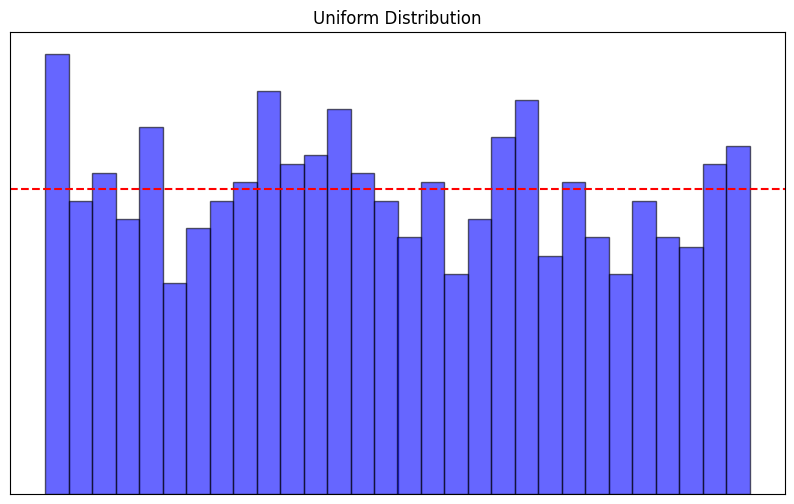

In [54]:
# Generate perfect uniform distribution
# Parameters
low = 0  # lower bound of the distribution
high = 1  # upper bound of the distribution
size = 1000  # number of samples

# Generate uniformly distributed data
data = np.random.uniform(low, high, size)

# Plot the data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black')

# Plotting the theoretical uniform distribution
plt.axhline(y=1/(high-low), color='r', linestyle='--')

# Adding title and labels
plt.title('Uniform Distribution')
# remove axis labels
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

# Show the plot
plt.show()

# Skewed and exponential distribution

c:\Users\SWECSAT056\Documents\KonaAI_ML\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


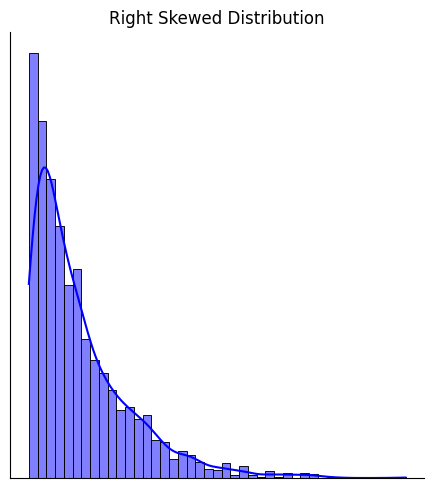

In [20]:
# generate perfect right skewed distribution
data = np.random.exponential(1, 1000)
data = np.concatenate((data, np.random.exponential(1, 1000)))
sns.displot(data, kde=True, color='blue')
plt.title('Right Skewed Distribution')
# remove axis labels
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

c:\Users\SWECSAT056\Documents\KonaAI_ML\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


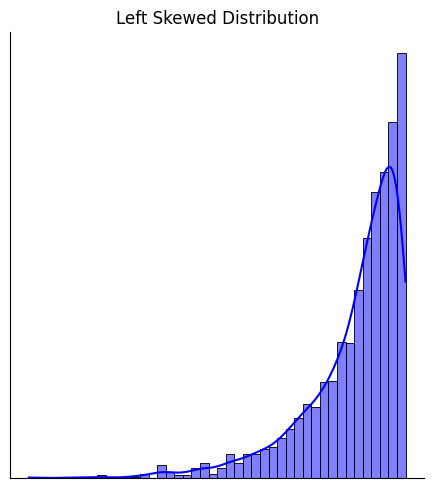

In [21]:
# generate perfect left skewed distribution
data = np.random.exponential(1, 1000)
data = np.concatenate((data, np.random.exponential(1, 1000)))
data = -data
sns.displot(data, kde=True, color='blue')
plt.title('Left Skewed Distribution')
# remove axis labels
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

# Log Normal Distribution

c:\Users\SWECSAT056\Documents\KonaAI_ML\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


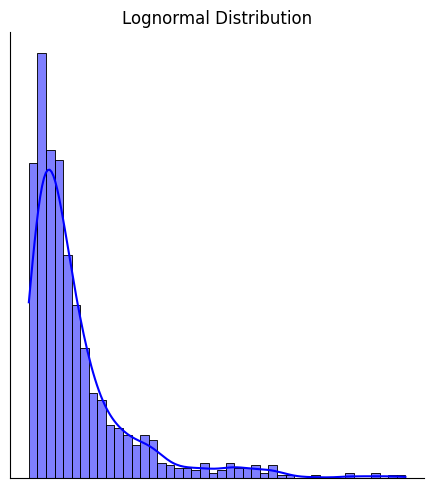

In [22]:
# generate perfect lognormal distribution
data = np.random.lognormal(0, 1, 1000)
sns.displot(data, kde=True, color='blue')
plt.title('Lognormal Distribution')
# remove axis labels
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

# Bimodal Distribution

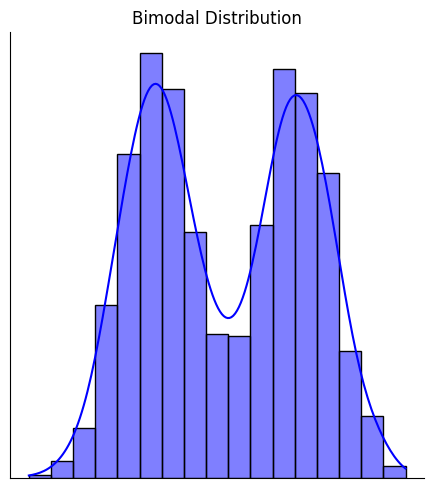

In [194]:
# generate symmetric bimodal distribution
data = np.random.normal(-2, 1, 1000)
data = np.concatenate((data, np.random.normal(2, 1, 1000)))
sns.displot(data, kde=True, color='blue')
plt.title('Bimodal Distribution')
# remove axis labels
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

c:\Users\SWECSAT056\Documents\KonaAI_ML\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


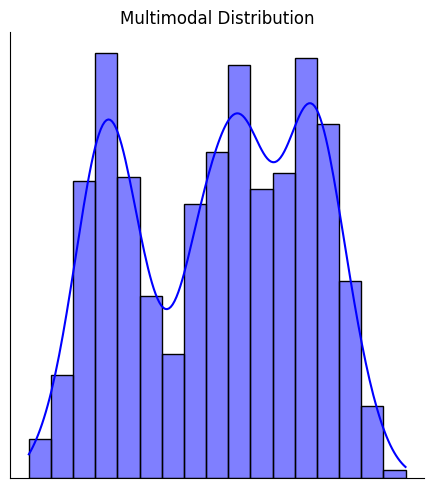

In [35]:
# generate asymmetric multimodal distribution
data = np.random.normal(-2, 1, 1000)
data = np.concatenate((data, np.random.normal(2, 1, 1000)))
data = np.concatenate((data, np.random.normal(5, 1, 1000)))
sns.displot(data, kde=True, color='blue')
plt.title('Multimodal Distribution')
# remove axis labels
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

# Identification of distribution

In [215]:
import numpy as np
import scipy.stats as stats
from sklearn.neighbors import KernelDensity
from scipy.signal import find_peaks
from typing import Literal, Union, List
import pandas as pd
from enum import Enum
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler, PowerTransformer

class DistributionType(Enum):
    SYMMETRIC = 'Symmetric'
    NORMAL = 'Normal'
    UNIFORM = 'Uniform'
    LOGNORMAL = 'Lognormal'
    RIGHT_SKEWED = 'Right skewed'
    LEFT_SKEWED = 'Left skewed'
    MULTIMODAL = 'Multimodal'
    UNKNOWN = 'Unknown'

class DistributionProcessor:
    @staticmethod
    def nomalize_data(data: Union[np.ndarray, pd.Series, List]) -> np.ndarray:
        dt = DistributionProcessor.classify_distribution(data)
        print(f'Distribution type: {dt}')
        sns.displot(data, kde=True, color='blue')
        plt.title('Original Data')
        plt.show()
        if dt in (DistributionType.UNKNOWN, DistributionType.SYMMETRIC, DistributionType.UNIFORM):
            data = StandardScaler().fit_transform(np.array(data).reshape(-1, 1)).flatten()
        if dt in (DistributionType.LOGNORMAL, DistributionType.RIGHT_SKEWED, DistributionType.LEFT_SKEWED):
            data = PowerTransformer(method='yeo-johnson').fit_transform(np.array(data).reshape(-1, 1)).flatten()
        elif dt == DistributionType.MULTIMODAL:
            data = QuantileTransformer(output_distribution='normal').fit_transform(np.array(data).reshape(-1, 1)).flatten()
        sns.displot(data, kde=True, color='blue')
        plt.title('Normalized Data')
        plt.show()
        print('-'*50)
        return data
    


    @staticmethod
    def classify_distribution(data: Union[np.ndarray, pd.Series, List]) -> DistributionType:
        # remove all nan values
        data = np.array(data)
        data = data[~np.isnan(data)]

        # Helper functions
        def check_normality(data):
            stat, p = stats.shapiro(data)
            return p > 0.05
        
        def check_uniform(data):
            _, p = stats.kstest(data, stats.uniform.cdf, method='approx')
            return p > 0.05

        def check_skewness(data):
            skewness = stats.skew(data)
            if skewness > 0.5:
                return DistributionType.RIGHT_SKEWED
            elif skewness < -0.5:
                return DistributionType.LEFT_SKEWED
            
            # check if symmetric
            return DistributionType.SYMMETRIC

        def check_multimodal(data):
            kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(np.array(data).reshape(-1, 1))
            s = np.linspace(min(data), max(data), 1000)
            e = kde.score_samples(s.reshape(-1, 1))
            peaks, _ = find_peaks(np.exp(e))
            return len(peaks) > 1

        # Classification
        if check_normality(data):
            return DistributionType.NORMAL

        skewness = check_skewness(data)

        if skewness == DistributionType.SYMMETRIC and check_uniform(data):
            return DistributionType.UNIFORM

        # return DistributionType.MULTIMODAL if check_multimodal(data) else skewness
        if check_multimodal(data):
            return DistributionType.MULTIMODAL
        
        return skewness if skewness else DistributionType.UNKNOWN
        


Distribution type: DistributionType.NORMAL


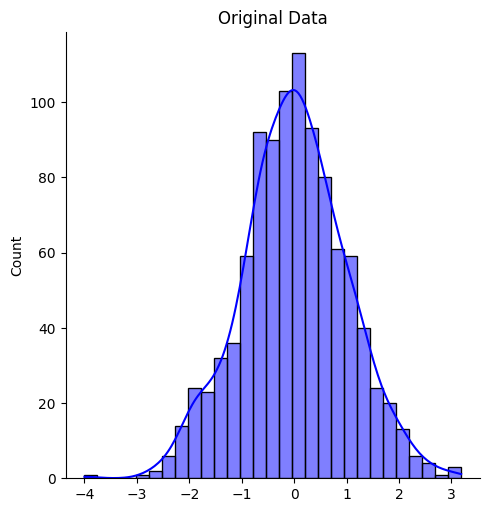

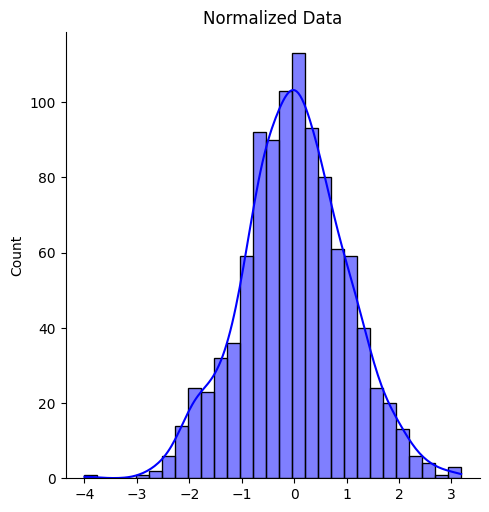

--------------------------------------------------
Distribution type: DistributionType.UNIFORM


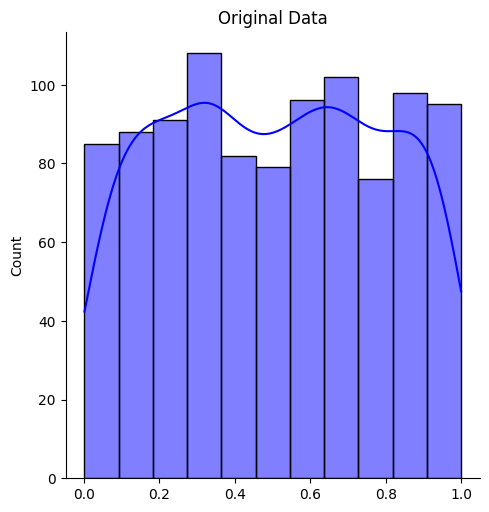

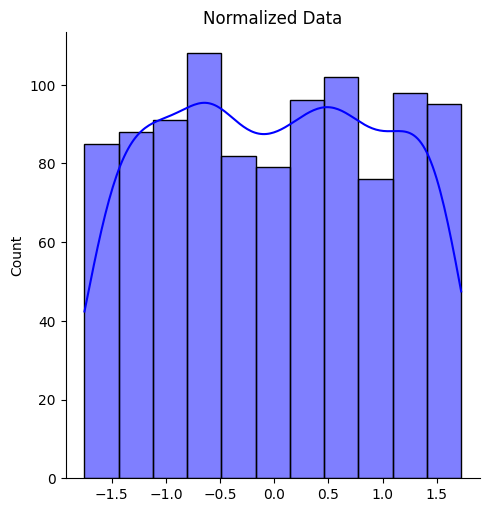

--------------------------------------------------
Distribution type: DistributionType.RIGHT_SKEWED


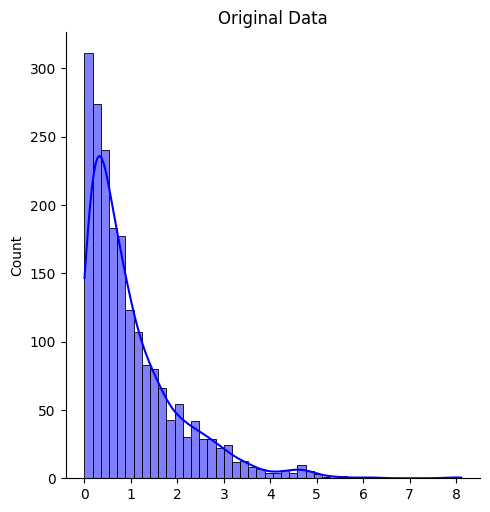

[-1.45086867  0.57642956  0.53569121 ... -1.673637    1.15920993
 -1.46566805]


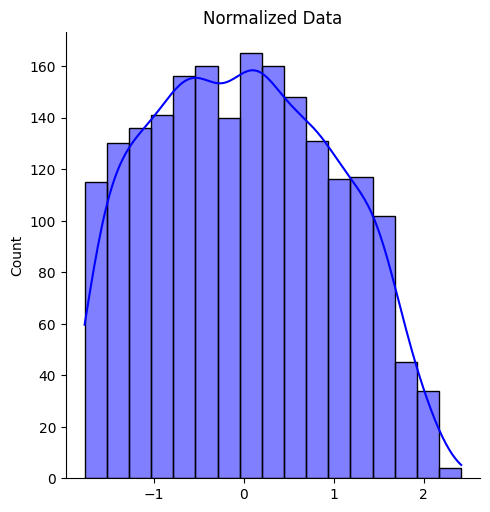

--------------------------------------------------
Distribution type: DistributionType.LEFT_SKEWED


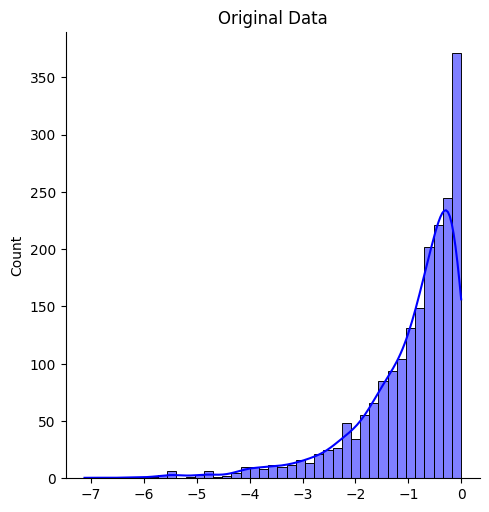

[-1.30140673  0.99633307  1.3431468  ...  0.78950008 -2.04824705
 -0.01684799]


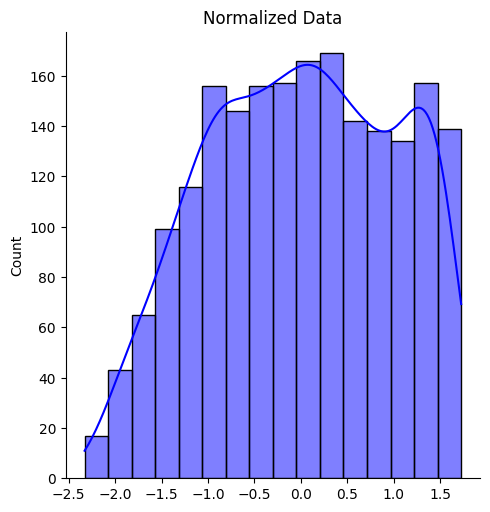

--------------------------------------------------
Distribution type: DistributionType.MULTIMODAL


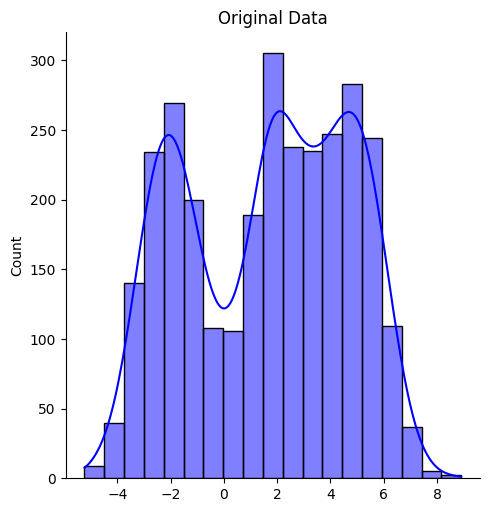

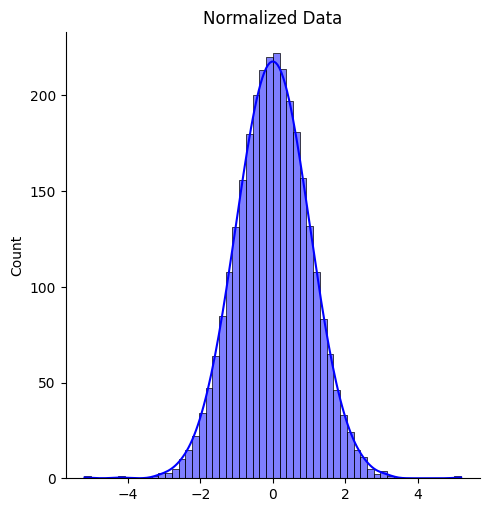

--------------------------------------------------
All tests passed successfully!


In [216]:
# disable seaborn warnings
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)


def plot_distribution(data: Union[np.ndarray, pd.Series, List], expected, predicted) -> None:
    print(f'Expected Distribution Type: {expected}')
    print(f'Predicted Distribution Type: {predicted}')
    sns.displot(data, kde=True, color='blue')
    # plt.title(title)
    # remove axis labels
    # plt.gca().axes.get_xaxis().set_visible(False)
    # plt.gca().axes.get_yaxis().set_visible(False)
    plt.show()

def test_distribution_type():
    # check for normal distribution
    data = np.random.normal(0, 1, 1000)
    dt = DistributionProcessor.classify_distribution(data)
    assert dt == DistributionType.NORMAL, plot_distribution(data, DistributionType.NORMAL, dt)
    DistributionProcessor.nomalize_data(data)

    # check for uniform distribution
    data = np.random.uniform(0, 1, 1000)
    dt = DistributionProcessor.classify_distribution(data)
    assert dt == DistributionType.UNIFORM, plot_distribution(data, DistributionType.UNIFORM, dt)
    DistributionProcessor.nomalize_data(data)

    # check for right skewed distribution
    data = np.random.exponential(1, 1000)
    data = np.concatenate((data, np.random.exponential(1, 1000)))
    dt = DistributionProcessor.classify_distribution(data)
    assert dt == DistributionType.RIGHT_SKEWED, plot_distribution(data, DistributionType.RIGHT_SKEWED, dt)
    DistributionProcessor.nomalize_data(data)

    # check for left skewed distribution
    data = np.random.exponential(1, 1000)
    data = np.concatenate((data, np.random.exponential(1, 1000)))
    data = -data
    dt = DistributionProcessor.classify_distribution(data)
    assert dt == DistributionType.LEFT_SKEWED, plot_distribution(data, DistributionType.LEFT_SKEWED, dt)
    DistributionProcessor.nomalize_data(data)

    # check for multimodal distribution
    data = np.random.normal(-2, 1, 1000)
    data = np.concatenate((data, np.random.normal(2, 1, 1000)))
    data = np.concatenate((data, np.random.normal(5, 1, 1000)))
    dt = DistributionProcessor.classify_distribution(data)
    assert dt == DistributionType.MULTIMODAL, plot_distribution(data, DistributionType.MULTIMODAL, dt)
    DistributionProcessor.nomalize_data(data)

    print('All tests passed successfully!')

test_distribution_type()

In [ ]:
# code for suming value
